In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [334]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [335]:
df = pd.read_parquet('my_data.parquet')
df = df.astype(str)

In [336]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [337]:
df['InvoiceNo'] = df['InvoiceNo'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')
df['Description'] = df['Description'].astype('category')
df['Quantity'] = df['Quantity'].astype('int32')
df['InvoiceDate'] = df['InvoiceDate'].astype('category')
df['UnitPrice'] = df['UnitPrice'].astype('float64')
df['CustomerID'] = df['CustomerID'].astype('float32')
df['Country'] = df['Country'].astype('category')

In [338]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [339]:
# 회원, 비회원 칼럼 생성
df['CustomerID'].isnull().value_counts(1)

CustomerID
False    0.750733
True     0.249267
Name: proportion, dtype: float64

In [340]:
df['isRegistered'] = df['CustomerID'].notnull()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True


In [341]:
df['InvoiceCode'] = df['InvoiceNo'].str.replace("[0-9]", '', regex=True)
df['InvoiceCode'].value_counts()

InvoiceCode
     532618
C      9288
A         3
Name: count, dtype: int64

In [342]:
len(df[df['TotalPrice'] < 0])

9290

In [343]:
len(df[df['InvoiceNo'].str.contains('C')])

9288

In [344]:
# invoicecode = A 인거 다 결측치하면 딱 될듯.

In [345]:
df['InvoiceCode'] = df['InvoiceNo'].str.replace("[0-9]", '', regex=True)
df['InvoiceCode'].value_counts()

InvoiceCode
     532618
C      9288
A         3
Name: count, dtype: int64

In [346]:
idx = df[df['InvoiceCode']=='A'].index
df.drop(idx, inplace=True)

In [347]:
df['isCancel'] = (df['InvoiceCode'] == 'C')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False


In [348]:
df['TotalPrice'] = df['TotalPrice'].astype(str)

In [349]:
df['TotalPrice'] = df['TotalPrice'].str.replace("-", '', regex=True)

In [350]:
df['TotalPrice'] = df['TotalPrice'].astype(float)

In [351]:
idx = df[df['TotalPrice'] == 0].index
df.drop(idx, inplace=True)

In [352]:
len(df)

539391

In [353]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False


### 취소 비율 가정
- 1. CustomerID = C, A
- 2. Quantity < 0
- 3. Quantity 먼저 처리해야 TotalPrice도 살릴 수 있음.
이 두개로 확인해놔야함.

C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


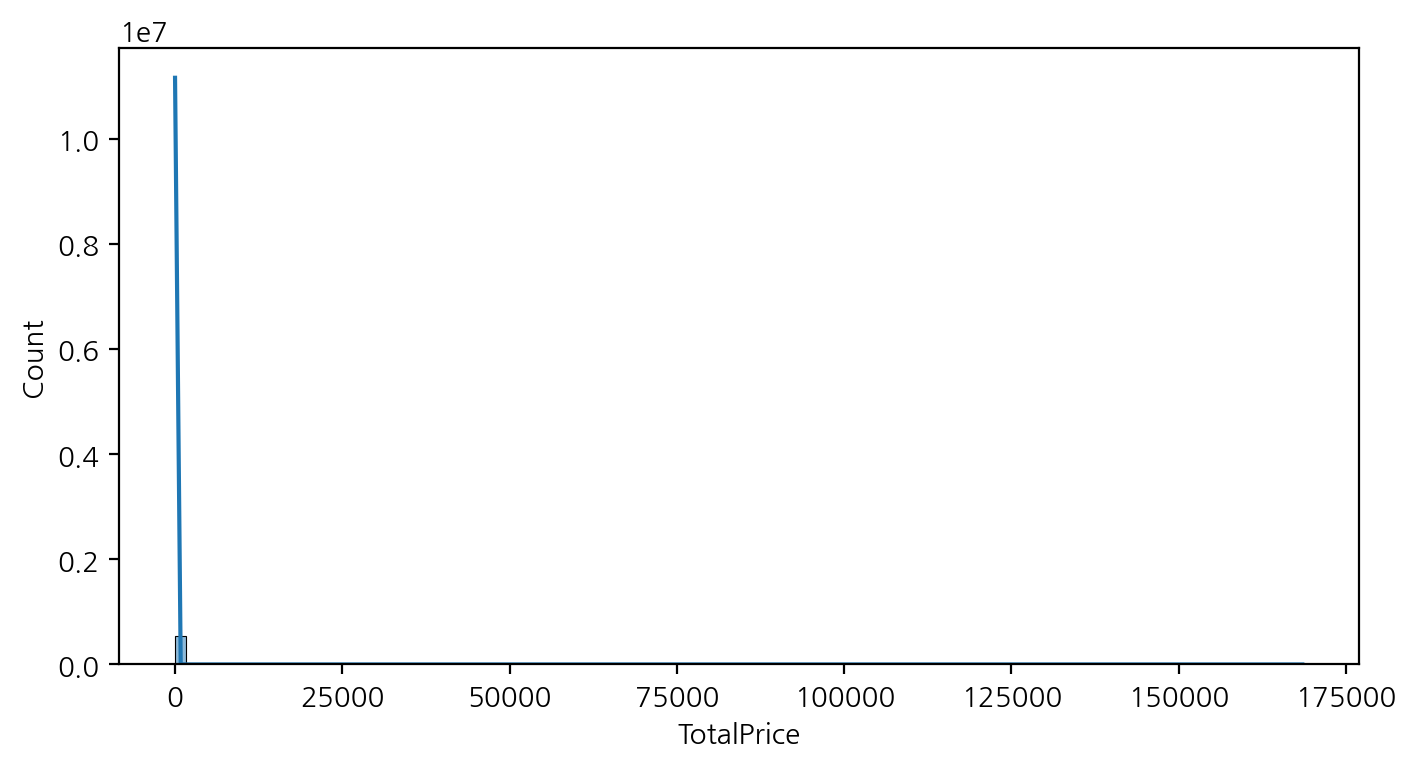

In [354]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['TotalPrice'], bins=100, kde=True)
plt.show()

In [355]:
df['isCancel'] = df['isCancel'] * 1
df['isRegistered'] = df['isRegistered'] * 1
df['Country'] = df['Country'].astype('category').cat.codes

In [356]:
data = df[['Country','TotalPrice','isCancel']]
data.head()

,Country,TotalPrice,isCancel
0,36,15.30,0
1,36,20.34,0
2,36,22.00,0
3,36,20.34,0
4,36,20.34,0


In [357]:
X_features = data.iloc[:, :-1]
y_target = data.iloc[:, -1]

X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

# TotalPrice 로그변환 이전

## 로지스틱

In [358]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현률: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'\
          .format(accuracy, precision, recall, f1, roc_auc))

In [359]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

# lr_pred : X_test를 이용해서 나온 레이블 값 모음, ex) [0,0,0,0,0,1,0,0,1 ...]
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[159032      0]
 [  2785      1]]
정확도: 0.9828, 정밀도: 1.0000, 재현률: 0.0004, F1: 0.0007, AUC: 0.5489


## LightGBM

In [360]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [361]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 6502, number of negative: 371071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 377573, number of used features: 2
오차 행렬
[[158926    106]
 [  2679    107]]
정확도: 0.9828, 정밀도: 0.5023, 재현률: 0.0384, F1: 0.0714, AUC: 0.7280


# TotalPrice 로그변환 이후

In [362]:
amount_n = np.log1p(df['TotalPrice'])

C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


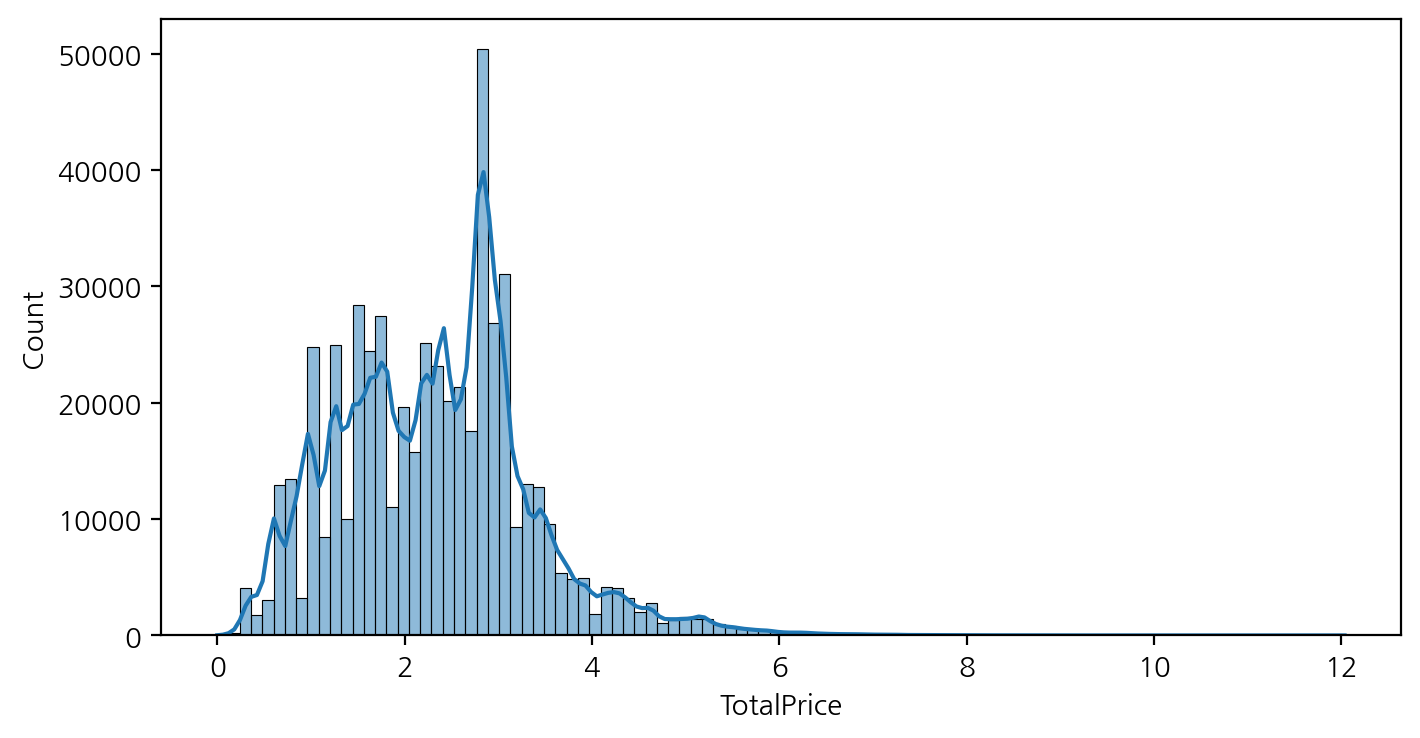

In [363]:
plt.figure(figsize=(8,4))
sns.histplot(amount_n, bins=100, kde=True)
plt.show()

In [364]:
amount_n = np.log1p(df['TotalPrice'])
data['TotalPrice'] = amount_n
data

C:\Users\hmins\AppData\Local\Temp\ipykernel_7404\3723932132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalPrice'] = amount_n


,Country,TotalPrice,isCancel
0,36,2.791165,0
1,36,3.060583,0
2,36,3.135494,0
3,36,3.060583,0
4,36,3.060583,0
...,...,...,...
541904,13,2.415914,0
541905,13,2.610070,0
541906,13,2.867899,0
541907,13,2.867899,0


In [369]:
X_features = data.iloc[:, :-1]
y_target = data.iloc[:, -1]


X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)


In [366]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts() / y_train.shape[0] * 100, '\n')

print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts() / y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
isCancel
0    98.277949
1     1.722051
Name: count, dtype: float64 

테스트 데이터 레이블 값 비율
isCancel
0    98.278313
1     1.721687
Name: count, dtype: float64


In [370]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

# lr_pred : X_test를 이용해서 나온 레이블 값 모음, ex) [0,0,0,0,0,1,0,0,1 ...]
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[159032      0]
 [  2786      0]]
정확도: 0.9828, 정밀도: 0.0000, 재현률: 0.0000, F1: 0.0000, AUC: 0.5478


C:\Users\hmins\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [367]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 6502, number of negative: 371071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 377573, number of used features: 2
오차 행렬
[[158928    104]
 [  2680    106]]
정확도: 0.9828, 정밀도: 0.5048, 재현률: 0.0380, F1: 0.0708, AUC: 0.7290


## 이상치 제거

In [374]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['isCancel'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    
    lowest_value = quantile_25 - iqr_weight
    higher_value = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_value) | (fraud > higher_value)].index
    
    return outlier_index

In [376]:
outlier_index_tp = get_outlier(df=data, column='TotalPrice', weight=1.5)

print('TotalPrice 이상치 인덱스', outlier_index_tp)
len(outlier_index_tp)

TotalPrice 이상치 인덱스 Index([  4287,   4857,   5232,   5233,   5235,   8320,  13042,  14498,  14716,
        14728,
       ...
       497391, 508561, 524601, 524602, 527314, 528087, 531819, 536914, 540422,
       541541],
      dtype='int64', length=447)


447

In [378]:
data.drop(outlier_index_tp, axis=0, inplace=True)

C:\Users\hmins\AppData\Local\Temp\ipykernel_7404\2320461795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(outlier_index_tp, axis=0, inplace=True)


In [379]:
X_features = data.iloc[:, :-1]
y_target = data.iloc[:, -1]


X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)


In [380]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 6189, number of negative: 371071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 377260, number of used features: 2
오차 행렬
[[158936     96]
 [  2557     95]]
정확도: 0.9836, 정밀도: 0.4974, 재현률: 0.0358, F1: 0.0668, AUC: 0.7334


## SMOTE 

In [382]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (377260, 2) (377260,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (742142, 2) (742142,)
SMOTE 적용 후 값의 분포 :
 isCancel
0    371071
1    371071
Name: count, dtype: int64


In [384]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 371071, number of negative: 371071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 742142, number of used features: 2
오차 행렬
[[103276  55756]
 [   837   1815]]
정확도: 0.6500, 정밀도: 0.0315, 재현률: 0.6844, F1: 0.0603, AUC: 0.7369
